# Tussenopdracht Advanced Datamining

## Studiejaar 2020-2021

1. [Inleiding](#Inleiding)
2. [Deel A](#Deel_A)
3. [Deel B](#Deel_B)
3. [Afsluiting](#Afsluiting)

### <a id='Inleiding'>Inleiding</a>

Dit is de *tussenopdracht* behorende bij het vak *Advanced Datamining* (BFVH4DMN2) voor het *studiejaar 2020-2021*. Deze tussenopdracht bestaat uit twee delen:

- in **Deel A** worden een aantal cellen code gedraaid om je module te testen;

- in **Deel B** wordt je gevraagd om je gemaakte model zelf toe te passen.

<div class="alert alert-info">**Opmerking:**<br />Dit notebook maakt gebruik van de module `data` die je op Blackboard kan vinden bij de werkcollegeopdrachten 1 & 2. Daarnaast dien je je eigen ontwikkelde `model` module te gebruiken.</div>

<div class="alert alert-danger">**Waarschuwing:**<br />Je code mag gebruik maken van alle functies uit de [Python Standard Library](https://docs.python.org/3/library/) (zoals `math`, `random`, `itertools`, enzovoorts); het is *niet* toegestaan om functies toe te passen uit bestaande machine learning modules (zoals `sklearn`, `tensorflow`, enzovoorts).</div>

Eerst zetten we weer wat initialisatie op en importeren we naast de `data` en `model` modules enkele onderdelen van `pandas` en `numpy`. Plaats de cursor in de cel hieronder en druk op Ctrl+Enter (of Shift+Enter om meteen naar de volgende cel te gaan).

In [1]:
%matplotlib inline
%reload_ext autoreload
# %autoreload 2

from pandas import DataFrame, __version__
print(f'Using pandas version {__version__}')

from numpy import array, __version__
print(f'Using numpy version {__version__}')

import model, data

Using pandas version 1.2.2
Using numpy version 1.20.1


### <a id='Deel_A'>Deel A</a>

Hieronder staan een aantal fragmenten code die je model *ongewijzigd* dient te kunnen uitvoeren. Voor verdere details omtrent deze gevraagde functionaliteiten, zie zonodig de werkcollege-opdrachten en/of de syllabus.

#### Activatiefuncties

In [2]:
my_activations = [model.linear, model.tanh, model.sign]
my_arguments =  [-100, -1, 0, 1, 100]
my_table = [[φ(a) for a in my_arguments] for φ in my_activations]
my_columns = [f'φ({a})' for a in my_arguments]
my_rows = [φ.__name__ for φ in my_activations]

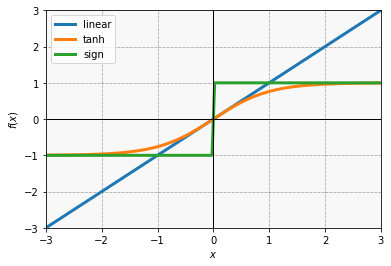

In [3]:
data.graph(my_activations)

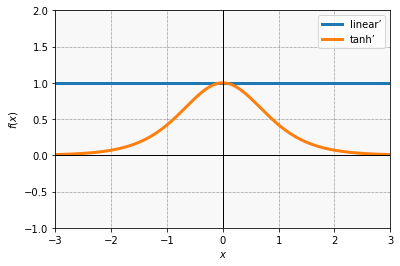

In [4]:
data.graph([model.derivative(φ) for φ in my_activations if φ != model.sign])

In [5]:
DataFrame(my_table, columns=my_columns).set_index(array(my_rows))

,φ(-100),φ(-1),φ(0),φ(1),φ(100)
linear,-100.0,-1.000000,0.0,1.000000,100.0
tanh,-1.0,-0.761594,0.0,0.761594,1.0
sign,-1.0,-1.000000,0.0,1.000000,1.0


#### Lossfuncties

In [6]:
my_losses = [model.mean_squared_error, model.mean_absolute_error, model.hinge]
my_arguments =  [-1000, -1, 0, 1, 1000]
my_table = [[L(a, 1.0) for a in my_arguments] for L in my_losses]
my_columns = [f'L({a}; 1)' for a in my_arguments]
my_rows = [L.__name__ for L in my_losses]

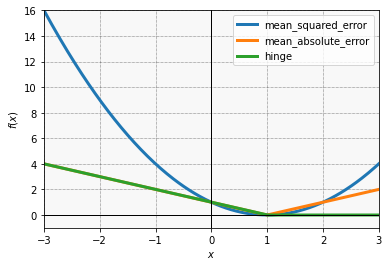

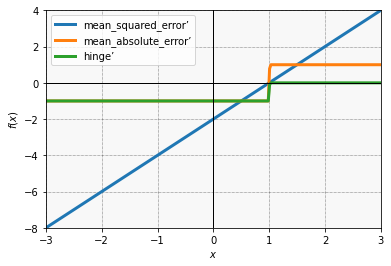

In [7]:
data.graph(my_losses, 1.0)
data.graph([model.derivative(L) for L in my_losses], 1.0)

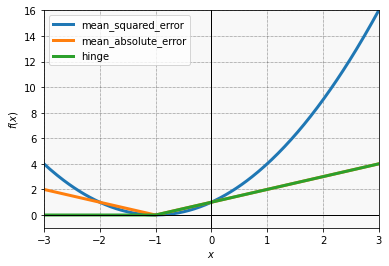

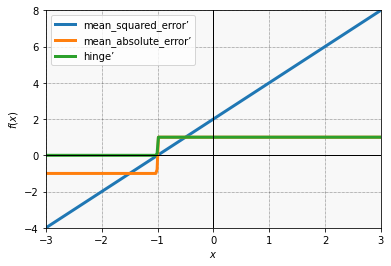

In [8]:
data.graph(my_losses, -1.0)
data.graph([model.derivative(L) for L in my_losses], -1.0)

In [9]:
DataFrame(my_table, columns=my_columns).set_index(array(my_rows))

,L(-1000; 1),L(-1; 1),L(0; 1),L(1; 1),L(1000; 1)
mean_squared_error,1002001.0,4.0,1.0,0.0,998001.0
mean_absolute_error,1001.0,2.0,1.0,0.0,999.0
hinge,1001.0,2.0,1.0,0.0,0.0


#### Perceptron

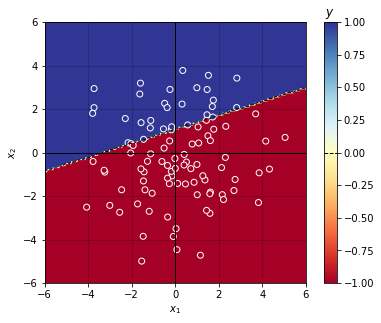

Perceptron(dim=2)
- bias = -31.0
- weights = [-9.293158270197573, 29.008783652228235]


In [10]:
xs, ys = data.linear('nominal')
my_model = model.Perceptron(dim=2)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

#### Lineaire regressie

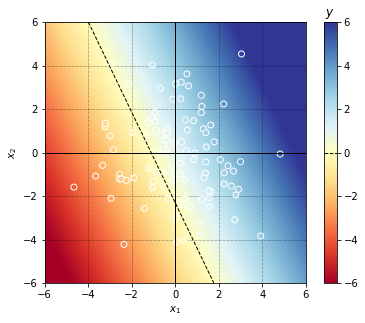

LinearRegression(dim=2)
- bias = 1.0020856473917652
- weights = [0.9035858976654213, 0.4341990611953949]


In [11]:
xs, ys = data.linear('numeric', noise=0.1)
my_model = model.LinearRegression(dim=2)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

#### Logistische regressie

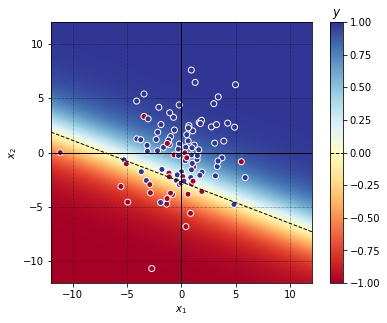

Neuron(dim=2, activation=tanh, loss=mean_squared_error)


In [12]:
xs, ys = data.linear(outcome='nominal', noise=2.0)
my_model = model.Neuron(dim=2, activation=model.tanh)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

#### Support vector machine

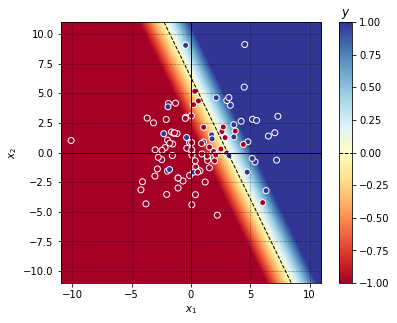

Neuron(dim=2, activation=linear, loss=hinge)


In [13]:
xs, ys = data.linear(outcome='nominal', noise=2.0)
my_model = model.Neuron(dim=2, loss=model.hinge)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

### <a id='Deel_B'>Deel B</a>

In dit deel ga je met een klassieke dataset aan de slag, de [Iris flower dataset](https://www.wikiwand.com/en/Iris_flower_data_set) die bestaat uit 3$\times$50 exemplaren van drie verschillende soorten irisbloemen waarvan de lengte en breedte van de kroon- en kelkbladeren is gemeten. In dit geval beperken we ons tot twee soorten: *Iris setosa* en *Iris versicolor*, respectievelijk gecodeerd als $y = -1$ en $y = 1$.

Hieronder wordt de bijbehorende data gedefinieerd.

In [14]:
xdata = [[5.1, 3.5, 1.4, 0.2], [7.0, 3.2, 4.7, 1.4], [4.9, 3.0, 1.4, 0.2], [6.4, 3.2, 4.5, 1.5], [4.7, 3.2, 1.3, 0.2], [6.9, 3.1, 4.9, 1.5], [4.6, 3.1, 1.5, 0.2], [5.5, 2.3, 4.0, 1.3], [5.0, 3.6, 1.4, 0.2], [6.5, 2.8, 4.6, 1.5], [5.4, 3.9, 1.7, 0.4], [5.7, 2.8, 4.5, 1.3], [4.6, 3.4, 1.4, 0.3], [6.3, 3.3, 4.7, 1.6], [5.0, 3.4, 1.5, 0.2], [4.9, 2.4, 3.3, 1.0], [4.4, 2.9, 1.4, 0.2], [6.6, 2.9, 4.6, 1.3], [4.9, 3.1, 1.5, 0.1], [5.2, 2.7, 3.9, 1.4], [5.4, 3.7, 1.5, 0.2], [5.0, 2.0, 3.5, 1.0], [4.8, 3.4, 1.6, 0.2], [5.9, 3.0, 4.2, 1.5], [4.8, 3.0, 1.4, 0.1], [6.0, 2.2, 4.0, 1.0], [4.3, 3.0, 1.1, 0.1], [6.1, 2.9, 4.7, 1.4], [5.8, 4.0, 1.2, 0.2], [5.6, 2.9, 3.6, 1.3], [5.7, 4.4, 1.5, 0.4], [6.7, 3.1, 4.4, 1.4], [5.4, 3.9, 1.3, 0.4], [5.6, 3.0, 4.5, 1.5], [5.1, 3.5, 1.4, 0.3], [5.8, 2.7, 4.1, 1.0], [5.7, 3.8, 1.7, 0.3], [6.2, 2.2, 4.5, 1.5], [5.1, 3.8, 1.5, 0.3], [5.6, 2.5, 3.9, 1.1], [5.4, 3.4, 1.7, 0.2], [5.9, 3.2, 4.8, 1.8], [5.1, 3.7, 1.5, 0.4], [6.1, 2.8, 4.0, 1.3], [4.6, 3.6, 1.0, 0.2], [6.3, 2.5, 4.9, 1.5], [5.1, 3.3, 1.7, 0.5], [6.1, 2.8, 4.7, 1.2], [4.8, 3.4, 1.9, 0.2], [6.4, 2.9, 4.3, 1.3], [5.0, 3.0, 1.6, 0.2], [6.6, 3.0, 4.4, 1.4], [5.0, 3.4, 1.6, 0.4], [6.8, 2.8, 4.8, 1.4], [5.2, 3.5, 1.5, 0.2], [6.7, 3.0, 5.0, 1.7], [5.2, 3.4, 1.4, 0.2], [6.0, 2.9, 4.5, 1.5], [4.7, 3.2, 1.6, 0.2], [5.7, 2.6, 3.5, 1.0], [4.8, 3.1, 1.6, 0.2], [5.5, 2.4, 3.8, 1.1], [5.4, 3.4, 1.5, 0.4], [5.5, 2.4, 3.7, 1.0], [5.2, 4.1, 1.5, 0.1], [5.8, 2.7, 3.9, 1.2], [5.5, 4.2, 1.4, 0.2], [6.0, 2.7, 5.1, 1.6], [4.9, 3.1, 1.5, 0.1], [5.4, 3.0, 4.5, 1.5], [5.0, 3.2, 1.2, 0.2], [6.0, 3.4, 4.5, 1.6], [5.5, 3.5, 1.3, 0.2], [6.7, 3.1, 4.7, 1.5], [4.9, 3.1, 1.5, 0.1], [6.3, 2.3, 4.4, 1.3], [4.4, 3.0, 1.3, 0.2], [5.6, 3.0, 4.1, 1.3], [5.1, 3.4, 1.5, 0.2], [5.5, 2.5, 4.0, 1.3], [5.0, 3.5, 1.3, 0.3], [5.5, 2.6, 4.4, 1.2], [4.5, 2.3, 1.3, 0.3], [6.1, 3.0, 4.6, 1.4], [4.4, 3.2, 1.3, 0.2], [5.8, 2.6, 4.0, 1.2], [5.0, 3.5, 1.6, 0.6], [5.0, 2.3, 3.3, 1.0], [5.1, 3.8, 1.9, 0.4], [5.6, 2.7, 4.2, 1.3], [4.8, 3.0, 1.4, 0.3], [5.7, 3.0, 4.2, 1.2], [5.1, 3.8, 1.6, 0.2], [5.7, 2.9, 4.2, 1.3], [4.6, 3.2, 1.4, 0.2], [6.2, 2.9, 4.3, 1.3], [5.3, 3.7, 1.5, 0.2], [5.1, 2.5, 3.0, 1.1], [5.0, 3.3, 1.4, 0.2], [5.7, 2.8, 4.1, 1.3]]
ydata = [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1]

Stel dat we aanvankelijk alleen de afmetingen van de *kelk*bladeren gebruiken om te pogen de beide soorten bloemen te onderscheiden. Hieronder worden deze data geselecteerd en getoond.

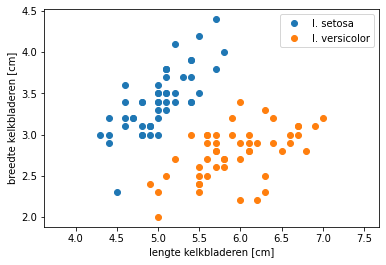

In [15]:
xs, ys = [x[0:2] for x in xdata], ydata

from matplotlib import pyplot as plt
plt.plot([x[0] for x, y in zip(xs, ys) if y < 0], [x[1] for x, y in zip(xs, ys) if y < 0], 'o', label='I. setosa')
plt.plot([x[0] for x, y in zip(xs, ys) if y > 0], [x[1] for x, y in zip(xs, ys) if y > 0], 'o', label='I. versicolor')
plt.xlabel('lengte kelkbladeren [cm]'); plt.ylabel('breedte kelkbladeren [cm]')
plt.axis('equal')
plt.legend()
plt.show()

**Opgave 1**

Welk van de onderstaande drie modellen acht je het meest geschikt om deze twee soorten bloemen op grond van de geselecteerde twee attributen te onderscheiden:

1. perceptron;
2. lineaire regressie;
3. logistische regressie?

Motiveer je antwoord.

In [16]:
# Het perceptron is in dit geval het meest geschikt om de twee soorten bloemen te onderscheiden,
# aangezien de data perfect lineair separabel is.
# Lineaire regressie is sowieso niet geschikt omdat deze geen labels voorspelt maar numerieke waarden.
# Logistische regressie kan, maar is niet nodig, omdat er geen onzekerheid hoeft te bestaan over de labels,
# vanwege de lineair separabeliteit van de data.

**Opgave 2**

Implementeer het model dat je in de vorige opgave gekozen hebt om de uitkomsten in `ys` te voorspellen uit de meetwaarden in `xs`. Gebruik de `data.scatter(xs, ys, model=my_model)` functie om de voorspellingen van je model `my_model` samen met de data weer te geven

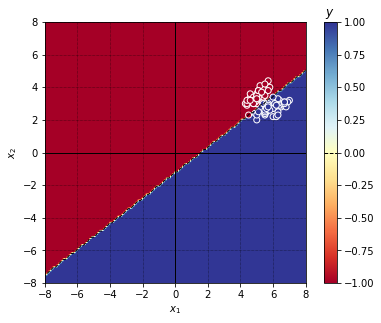

Perceptron(dim=2)
- bias = -211.0
- weights = [134.3000000000025, -171.299999999997]


In [17]:
my_model = model.Perceptron(dim=2)
my_model.fit(xs, ys)
data.scatter(xs, ys, model=my_model)
print(my_model)

Vervolgens keren we terug naar de gehele dataset met vier attributen.

In [18]:
xs, ys = xdata, ydata

DataFrame(xdata, columns=['x1', 'x2', 'x3', 'x4']).assign(y=ydata)

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,-1
1,7.0,3.2,4.7,1.4,1
2,4.9,3.0,1.4,0.2,-1
3,6.4,3.2,4.5,1.5,1
4,4.7,3.2,1.3,0.2,-1
...,...,...,...,...,...
95,6.2,2.9,4.3,1.3,1
96,5.3,3.7,1.5,0.2,-1
97,5.1,2.5,3.0,1.1,1
98,5.0,3.3,1.4,0.2,-1


**Opgave 3**

Gebruik je `Neuron()` class om een *Support Vector Machine* genaamd `my_svm` te instantiëren om deze complete dataset mee te fitten. Train het model en kies de learning rate en het aantal epochs daarbij zodanig dat het model na afloop álle instances juist weet te voorspellen.

In [19]:
my_svm = model.Neuron(dim=4, loss=model.hinge)
my_svm.fit(xs, ys)
print(my_model)

Perceptron(dim=2)
- bias = -211.0
- weights = [134.3000000000025, -171.299999999997]


De onderstaande cel vertelt je of je model alle voorspellingen goed doet.

In [20]:
ys == [model.sign(yhat) for yhat in my_svm.predict(xs)]

True

**Opgave 4**

Een neuron kan dezelfde predicties maken als een perceptron door het de signum-functie te geven als activatiefunctie. Toch wordt de signum-functie zelden als activatie-functie gebruikt. Wat is namelijk het probleem dat hierbij optreedt?

In [21]:
# De signum functie heeft helaas geen geschikte afgeleide (de helling is altijd ofwel nul, ofwel oneindig groot).

**Opgave 5**

Desalniettemin kan een neuron een model implementeren dat exact equivalent is aan het perceptron. Het enige verschil is dat het model een *lineaire activatiefunctie* bevat en daardoor niet het *nominale* label $-1$ of $+1$ oplevert, maar de gebruiker zelf naar het teken van de *numerieke* uitkomst moet kijken om het juiste label toe te kennen. Een dergelijk model kan worden geconstrueerd door een speciale *perceptron loss-functie* te gebruiken: $\mathcal{L}\left(\hat{y};y\right)=\max\left(-y\cdot\hat{y}, 0 \right)$.

Definieer deze loss-functie in de cel hieronder en gebruik deze om met je `Neuron()` class een model genaamd `my_perceptron` te maken dat het Rosenblatt-perceptron nabootst. Pas deze wederom toe op de complete dataset met iris bloemen en stel je training zodanig in dat deze alle bloemen juist leert te classificeren.

In [22]:
def perceptron_loss_function(yhat, y):
    return max(-y * yhat, 0)

my_perceptron = model.Neuron(dim=4, loss=perceptron_loss_function)
my_perceptron.fit(xs, ys)
print(my_perceptron)

Neuron(dim=4, activation=linear, loss=perceptron_loss_function)


De onderstaande cel vertelt je of je model alle voorspellingen goed doet.

In [23]:
ys == [model.sign(yhat) for yhat in my_perceptron.predict(xs)]

True

### <a id='Afsluiting'>Afsluiting</a>

Als je klaar bent, lever dan je uitwerkingen als volgt in:

1. Evalueer dit notebook door vanuit het menu *Kernel > Restart & Run All* te kiezen;

2. Controleer dat alle uitvoer correct en volledig wordt geproduceerd;

3. Sla dit notebook op als **tussenopdracht_*.ipynb** middels het menu *File > Save and Checkpoint*;

4. Comprimeer je bestanden **model.py** en **tussenopdracht_*.ipynb** tot één bestand **tussenopdracht.zip**;

5. Lever je zip-bestand in op BlackBoard.

Succes!

***

<small>&copy; 2021, Dave R.M. Langers, [d.r.m.langers@pl.hanze.nl](mailto:d.r.m.langers@pl.hanze.nl)</small>